In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.dummy import DummyClassifier

# Load data
data = pd.read_csv(r"C:\Users\will2\OneDrive\Skrivebord\S.E.M.L\HR_data.csv")

# Initialize lists to store scores
rf_scores = []
baseline_scores = []
lr_scores = []

# Define baseline model
baseline_model = DummyClassifier(strategy="most_frequent")

# Define Random Forest model with parameters found using grid search
rf_model = RandomForestClassifier(max_depth=7, max_features=40, min_samples_leaf=4, n_estimators=300)

# Define Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Binarize the 'Frustrated' column based on the mean
data['Frustrated'] = data['Frustrated'].apply(lambda x: 1 if x <= data['Frustrated'].mean() else 0)

# Loop through each unique phase and individual
for i, phase in enumerate(data['Phase'].unique()):
    for j, individual in enumerate(data['Individual'].unique()):
        # Split data into training and testing sets
        train_data = data[(data['Phase'] != phase) & (data['Individual'] != individual)]
        test_data = data[(data['Phase'] == phase) & (data['Individual'] == individual)]
        
        attributes = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
        X_train = train_data[attributes]
        X_test = test_data[attributes]
        y_train = train_data['Frustrated']
        y_test = test_data['Frustrated']
        
        # Train and evaluate the Random Forest model
        rf_model.fit(X_train, y_train)
        y_rf_pred = rf_model.predict(X_test)
        rf_scores.append(accuracy_score(y_test, y_rf_pred))
        
        # Train and evaluate the Logistic Regression model
        lr_model.fit(X_train, y_train)
        y_lr_pred = lr_model.predict(X_test)
        lr_scores.append(accuracy_score(y_test, y_lr_pred))
        
        # Train and evaluate the baseline model
        baseline_model.fit(X_train, y_train)
        y_baseline_pred = baseline_model.predict(X_test)
        baseline_scores.append(accuracy_score(y_test, y_baseline_pred))

# Calculate and print average scores
print("Random Forest LOGO CV Accuracy: {:.2f}".format(np.mean(rf_scores)))
print("Logistic Regression LOGO CV Accuracy: {:.2f}".format(np.mean(lr_scores)))
print("Baseline LOGO CV Accuracy: {:.2f}".format(np.mean(baseline_scores)))

# Print classification reports for the last fold (as an example)
print("\nRandom Forest Classification Report for Last Fold:\n")
print(classification_report(y_test, y_rf_pred))

print("\nLogistic Regression Classification Report for Last Fold:\n")
print(classification_report(y_test, y_lr_pred))

print("\nBaseline Classification Report for Last Fold:\n")
print(classification_report(y_test, y_baseline_pred))


Random Forest LOGO CV Accuracy: 0.47
Logistic Regression LOGO CV Accuracy: 0.54
Baseline LOGO CV Accuracy: 0.43

Random Forest Classification Report for Last Fold:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4


Logistic Regression Classification Report for Last Fold:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Baseline Classification Report for Last Fold:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy      

c:\Users\will2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\will2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\will2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [66]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)


Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.400 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.571 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.412 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.371 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.657 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.441 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.343 total time=   0.6s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.571 total time=   0.6s
[CV 3/3] END max_depth=3, max_fea

In [67]:
print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Best hyperparameters are {'max_depth': 7, 'max_features': 40, 'min_samples_leaf': 4, 'n_estimators': 300}
Best score is: 0.5669467787114847


In [91]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.dummy import DummyClassifier
from statsmodels.stats.contingency_tables import mcnemar

# Load data
data = pd.read_csv(r"C:\Users\will2\OneDrive\Skrivebord\S.E.M.L\HR_data.csv")

# Initialize lists to store scores and predictions
rf_scores = []
lr_scores = []
baseline_scores = []

# Lists to store correct/incorrect classifications for McNemar's test
rf_correct = []
lr_correct = []
bs_correct =[]
# Define baseline model
baseline_model = DummyClassifier(strategy="most_frequent")

# Define Random Forest model with parameters found using grid search
rf_model = RandomForestClassifier(max_depth=7, max_features=40, min_samples_leaf=4, n_estimators=300)

# Define Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Binarize the 'Frustrated' column based on the mean
data['Frustrated'] = data['Frustrated'].apply(lambda x: 1 if x <= data['Frustrated'].mean() else 0)

# Loop through each unique phase and individual
for i, phase in enumerate(data['Phase'].unique()):
    for j, individual in enumerate(data['Individual'].unique()):
        # Split data into training and testing sets
        train_data = data[(data['Phase'] != phase) & (data['Individual'] != individual)]
        test_data = data[(data['Phase'] == phase) & (data['Individual'] == individual)]
        
        attributes = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
        X_train = train_data[attributes]
        X_test = test_data[attributes]
        y_train = train_data['Frustrated']
        y_test = test_data['Frustrated']
        
        # Train and evaluate the Random Forest model
        rf_model.fit(X_train, y_train)
        y_rf_pred = rf_model.predict(X_test)
        rf_scores.append(accuracy_score(y_test, y_rf_pred))
        
        # Train and evaluate the Logistic Regression model
        lr_model.fit(X_train, y_train)
        y_lr_pred = lr_model.predict(X_test)
        lr_scores.append(accuracy_score(y_test, y_lr_pred))
        
        # Train and evaluate the baseline model
        baseline_model.fit(X_train, y_train)
        y_baseline_pred = baseline_model.predict(X_test)
        baseline_scores.append(accuracy_score(y_test, y_baseline_pred))
        
        # Store correct/incorrect classifications for McNemar's test
        rf_correct.extend(y_rf_pred == y_test)
        lr_correct.extend(y_lr_pred == y_test)
        bs_correct.extend(y_baseline_pred == y_test)

# Calculate and print average scores
print("Random Forest LOGO CV Accuracy: {:.2f}".format(np.mean(rf_scores)))
print("Logistic Regression LOGO CV Accuracy: {:.2f}".format(np.mean(lr_scores)))
print("Baseline LOGO CV Accuracy: {:.2f}".format(np.mean(baseline_scores)))

# Print classification reports for the last fold (as an example)
print("\nRandom Forest Classification Report for Last Fold:\n")
print(classification_report(y_test, y_rf_pred))

print("\nLogistic Regression Classification Report for Last Fold:\n")
print(classification_report(y_test, y_lr_pred))

print("\nBaseline Classification Report for Last Fold:\n")
print(classification_report(y_test, y_baseline_pred))


Random Forest LOGO CV Accuracy: 0.45
Logistic Regression LOGO CV Accuracy: 0.54
Baseline LOGO CV Accuracy: 0.43

Random Forest Classification Report for Last Fold:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4


Logistic Regression Classification Report for Last Fold:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Baseline Classification Report for Last Fold:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy      

c:\Users\will2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\will2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\will2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

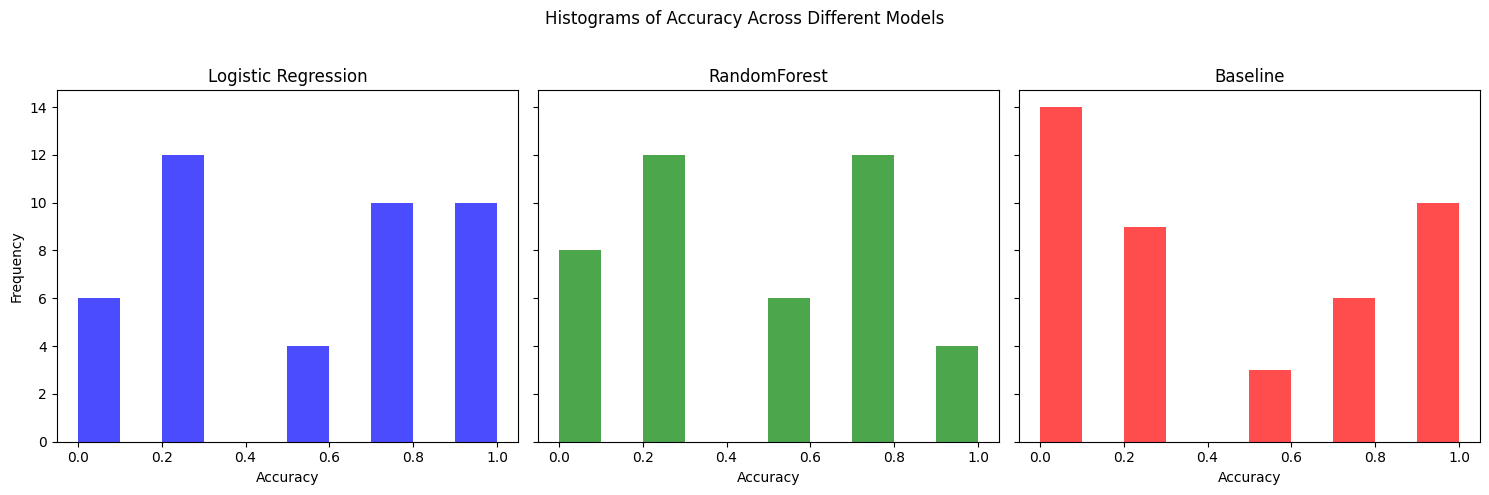

Random Forest LOGO CV Accuracy: 0.45238
Logistic Regression LOGO CV Accuracy: 0.53571
Baseline LOGO CV Accuracy: 0.43452


In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot histograms
axes[0].hist(lr_scores, bins=10, color='blue', alpha=0.7)
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Frequency')

axes[1].hist(rf_scores, bins=10, color='green', alpha=0.7)
axes[1].set_title('RandomForest')
axes[1].set_xlabel('Accuracy')

axes[2].hist(baseline_scores, bins=10, color='red', alpha=0.7)
axes[2].set_title('Baseline')
axes[2].set_xlabel('Accuracy')

# Adjust layout
plt.suptitle('Histograms of Accuracy Across Different Models')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print("Random Forest LOGO CV Accuracy: {:.5f}".format(np.mean(rf_scores)))
print("Logistic Regression LOGO CV Accuracy: {:.5f}".format(np.mean(lr_scores)))
print("Baseline LOGO CV Accuracy: {:.5f}".format(np.mean(baseline_scores)))



In [93]:
import scipy.stats as stats
df1 = pd.DataFrame({'RF': rf_correct, 'LR': lr_correct})

# Generate the contingency table
contingency_table_rflr = pd.crosstab(df1['RF'], df1['LR'])
result = mcnemar(contingency_table_rflr, exact=True)
print("\nMcNemar's Test Result:\n", result)
n = contingency_table_rflr.values.sum()
b = contingency_table_rflr.at[True, False]
c = contingency_table_rflr.at[False, True]
p_hat = b / n
q_hat = c / n
se = np.sqrt((p_hat + q_hat) / n)
alpha = 0.05
z = stats.norm.ppf(1 - alpha / 2)
ci_lower = (p_hat - q_hat) - z * se
ci_upper = (p_hat - q_hat) + z * se

print("\nConfidence Interval for the difference in proportions:")
print(f"{ci_lower:.5f} to {ci_upper:.5f}")




McNemar's Test Result:
 pvalue      0.048766765904474596
statistic   15.0

Confidence Interval for the difference in proportions:
-0.16072 to -0.00595


In [94]:

df2 = pd.DataFrame({'RF': rf_correct, 'Baseline': bs_correct})

# Generate the contingency table
contingency_table_rfbs = pd.crosstab(df2['RF'], df2['Baseline'])
result = mcnemar(contingency_table_rfbs, exact=True)
print("\nMcNemar's Test Result:\n", result)
n = contingency_table_rfbs.values.sum()
b = contingency_table_rfbs.at[True, False]
c = contingency_table_rfbs.at[False, True]
p_hat = b / n
q_hat = c / n
se = np.sqrt((p_hat + q_hat) / n)
alpha = 0.05
z = stats.norm.ppf(1 - alpha / 2)
ci_lower = (p_hat - q_hat) - z * se
ci_upper = (p_hat - q_hat) + z * se

print("\nConfidence Interval for the difference in proportions:")
print(f"{ci_lower:.5f} to {ci_upper:.5f}")



McNemar's Test Result:
 pvalue      0.7607916425613439
statistic   20.0

Confidence Interval for the difference in proportions:
-0.05864 to 0.09436


In [95]:
df3 = pd.DataFrame({'LR': lr_correct, 'Baseline': bs_correct})

# Generate the contingency table
contingency_table_rfbs = pd.crosstab(df3['LR'], df3['Baseline'])
result = mcnemar(contingency_table_rfbs, exact=True)
print("\nMcNemar's Test Result:\n", result)

n = contingency_table_rfbs.values.sum()
b = contingency_table_rfbs.at[True, False]
c = contingency_table_rfbs.at[False, True]
p_hat = b / n
q_hat = c / n
se = np.sqrt((p_hat + q_hat) / n)
alpha = 0.05
z = stats.norm.ppf(1 - alpha / 2)
ci_lower = (p_hat - q_hat) - z * se
ci_upper = (p_hat - q_hat) + z * se

print("\nConfidence Interval for the difference in proportions:")
print(f"{ci_lower:.5f} to {ci_upper:.5f}")



McNemar's Test Result:
 pvalue      0.005988120567053557
statistic   9.0

Confidence Interval for the difference in proportions:
0.03217 to 0.17021


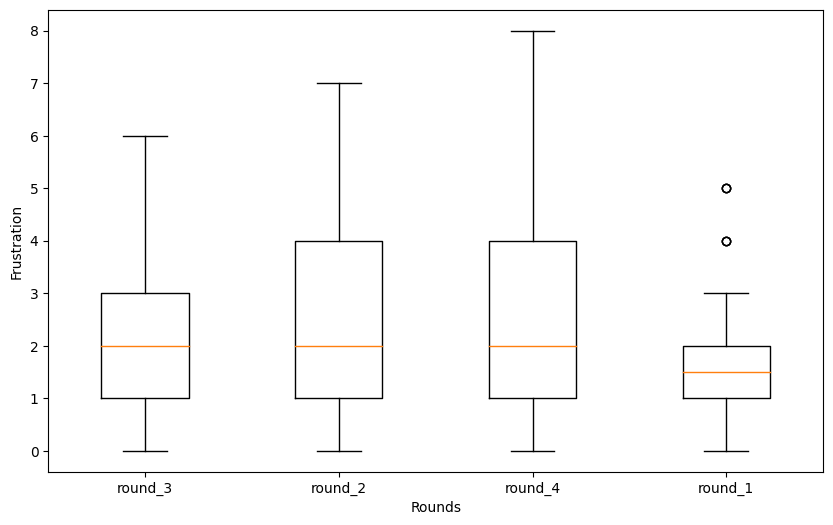

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv(r"C:\Users\will2\OneDrive\Skrivebord\S.E.M.L\HR_data.csv")

# Extract unique phases
phases = data['Round'].unique()

# Create a list of frustration levels for each phase
data_to_plot = [data[data['Round'] == phase]['Frustrated'] for phase in phases]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=phases)
#plt.title('Box plot of Frustrated across different Phases')
plt.xlabel('Rounds')
plt.ylabel('Frustration')
plt.show()


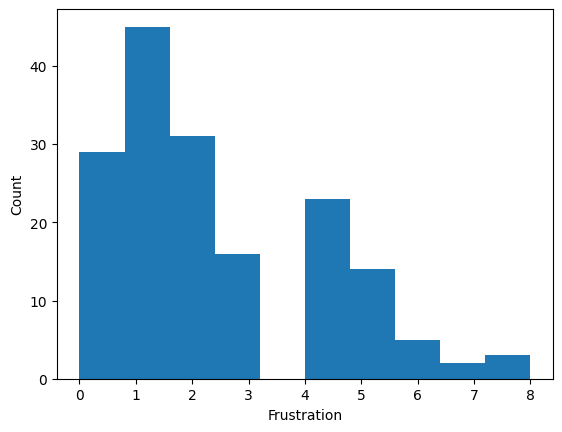

In [21]:

plt.hist(data['Frustrated'])
plt.xlabel('Frustration')
plt.ylabel('Count')
plt.show()

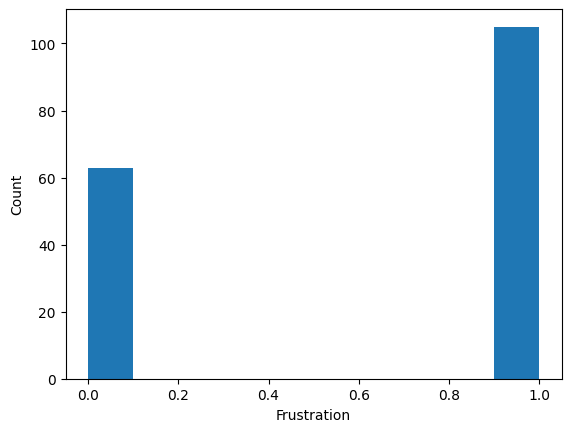

In [35]:
data['Frustrated'] = data['Frustrated'].apply(lambda x: 1 if x <= data['Frustrated'].mean() else 0)

plt.hist(data['Frustrated'])
plt.xlabel('Frustration')
plt.ylabel('Count')
plt.show()